2025-10-02  

# 学習内容  
### 書籍/教材:スッキリわかるPythonによる機械学習入門  
### 範囲: 第8章 回帰2:住宅の平均価格の予測  
### 目的: 重回帰予測により住宅の平均価格を予測する。  

 -----------------------------
## <関数まとめ>  
df.corr()  

pd.Sereis(リスト,index = インデックスのリスト)  

se.map(関数名)  

se.sort_values(ascending = True or False)  

変数=StandardScaler()  

 -----------------------------
## <内容まとめ>    
**・検証データ**  
７章では、モデルを評価した後、トライアル＆エラーでモデルに学習させてテストデータでの正解率をあげていった。これは「テストデータに都合がよいようにチューニングしている」といえる。そのため
、訓練データとテストデータに加えて、学習には使用せず、チューニングの参考にするためにモデルの予測性能だけを計算するデータである**検証データ**の３つに分割する。
なお、データの前処理の前にデータの分割は行う必要があるが、**ダミー変数化のみデータの分割の前にやる必要があることに注意**。  

**・特徴量の選択**  
決定木分析では、特徴量として何種類かの列を指定すると、内部で予測に使う列と使わない列をモデル自体が取捨選択してくれた。しかし**重回帰分析では、特徴量の取捨選択が行われないため、事前に人が取捨選択をしてあげる必要がある。**
 散布図は二つの項目の関係性を表す図なので、データが右肩上がりor右肩下がりの分布は予測に大きな影響を与えている特徴量だと言える。(相関関係がある。)データがばらばらにプロットされてる場合は、有効な特徴量である可能性は低い。  

**・corrメソッドによる列同士の相関係数の測定**  
**特徴量と正解データの相関係数が大きいほど、特徴量が予測に与える影響が大きい**ことを意味する。corrメソッドを使うことで、各列同士の相関係数を調べることができる。  

```python
train_val4.corr()
```

これより、各項目の相関係数を一覧表にしたものを**相関行列**という。  

**・シリーズの各要素を絶対値へ変換(map処理)**  
相関行列から、正解データに関する列のみを取り出すと、列数が1であるため、返り値がシリーズとなる。これを絶対値に変換して大きい順に並び変えたい。絶対値に変換するには**abs関数**という関数があるが、**mapメソッド**を使えば、forループを使わずに実装できる。  
```python
# abs関数
print(abs(-1)) 

#mapメソッド
se = pd.Series([1,-2,3,-4]) # シリーズの作成
# seの各要素にabs関数を適応させた結果をシリーズ化
se.map(abs)
```

**・シリーズおよびデータフレームの並び替え**  
sort_valuesメソッドを利用すると要素を並び替えることが出来る。引数ascendingには、昇順の場合はTrue,降順の場合はFalseを指定する。  
```python
# シリーズ
se.sort_values(ascending = True)
# データフレーム　引数byには並び替えの基準となる列を指定
df.sort_values(by = ~, ascending = False)
```

**・標準化**  
標準化を行うと、**元のデータ集合がどのような分布でも、標準化後のデータ集合は「平均値が0、標準偏差が1」の分布になる**。これにより、各特徴量の分布の特徴が統一され、適切な比較と分析が可能になる。以下に具体的な手順を示す。  
x1,x2,...を標準化して、z1,z2,...というデータ集合を作るとする。元のデータ集合の平均値をm、標準偏差をSDとすると、以下のようになる。  

$$
z1 = \frac{x1 - m}{SD},\, z2 = \frac{x2-m}{SD},・・・
$$

**・preprocessingモジュールによる標準化**  
scikit-learnのpreprocessingモジュールのStandardScalerクラスをインポートし、オブジェクトを生成する。fitメソッドは、引数に指定したデータフレームの平均値と標準偏差を計算する。その後transformメソッドに元のデータを渡して呼び出すと、戻り値として標準化されたデータを返してくれる。  
以下は自分なりの解釈。  
StandardScalerクラスには属性として各統計量が定義されており、インスタンスがfitメソッドを呼び出すことにより、引数データの各統計量が計算され各属性の変数に格納される。またStandardScalerクラスには(x-平均)/標準偏差を行うようなtransform()メソッドが定義されており、そのクラスのインスタンスがtransformメソッドを呼び出すことにより、インスタンス自身がもつ各統計量を用いて計算されることにより、標準化できる。  
```python
from sklearn.preprocessing import StandardScaler
sc_model_x = StandardScaler()
sc_model_x.fit(x_train) # 各列の平均値と標準偏差を調べて格納している
# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
```

**・標準化データによる予測性能の評価**  
scoreメソッドで決定係数を求めた時、決定係数が負の値になることがある。これは以下のような原因が考えられる。  
1.予測に有効な特徴量がない状態で無理やりモデルを学習させたため。  
2.学習に利用したデータと全く関係のない別のデータで、決定係数を計算した。  
**モデルの学習時に標準化後のデータを利用した場合、そのモデルは標準化後の特徴量から標準化後の正解データを予測するためにしか使えないことに注意。**  

**・特徴量エンジニアリング**  
準備されたデータをもとに新しい列を作成して、特徴量に加えることを、**特徴量エンジニアリング**という。

**・多項式特徴量と多項式回帰**  
元のデータ列に対して2乗した値の列や、3乗した値の列であるような特徴量を**多項式特徴量**といい、多項式特徴量を用いた回帰分析を、**多項式回帰**という。

〇列の追加
```python
df['新しい列名'] = シリーズ
```
〇行の追加
```python
df.loc[新しいインデックス名] = シリーズ
```

**・交互作用特徴量**  
特徴量同士を組み合わせて新しい特徴量を作ることを**交互作用特徴量**という。交互作用特徴量は、2つの列の対応する要素同士を乗算して作成する。
```python
# 2つのシリーズに算術演算を行う
se1 = pd.Series([1,2,3])
se2 = pd.Series([10,20,30])
se1 + se2
```
実行結果
```
0  11
1  22
2  33
```



-----------------------------
## まとめ  

・検証データを作ることで、「テストデータに都合の良いようにチューニングをしていた」問題を解決  

・重回帰分析では特徴量を事前に取捨選択する必要がある。  

・corr関数で相関係数を計算し相関行列を作成することで、予測に与える影響が大きい特徴量がわかる。  

・標準化を行うことで、各特徴量の比較・分析が可能になる。  

・もとの列を累乗した値の列を追加して回帰分析を行うことを多項式回帰と呼ぶ。  

・2つの列の対応する値を乗算して作る列を交互作用特徴量と呼ぶ。  

・訓練データと検証データでチューニングし終えたら、2つを全体の訓練データとして、改めてモデルに再学習させる。  
 
・訓練データと同様の前処理とチューニングをテストデータに施して、学習済みモデルで予測性能を検証する。  

・正解データを標準化している場合は、予測結果も標準化されるため、標準化前に逆変換する必要がある。  

--------------------------------------
## 以下は実装例  

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv('chap08/Boston.csv')
df.head(2)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [58]:
df['CRIME'].value_counts()

CRIME
very_low    50
high        25
low         25
Name: count, dtype: int64

In [59]:
crime = pd.get_dummies(df['CRIME'], drop_first = True, dtype = int)

df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(['CRIME'], axis = 1)
df2.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [60]:
# 訓練データ＆検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

In [61]:
train_val.isnull().sum()

ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

In [62]:
# 欠損値の穴埋め
train_val_mean = train_val.mean()
train_val2 = train_val.fillna(train_val_mean)

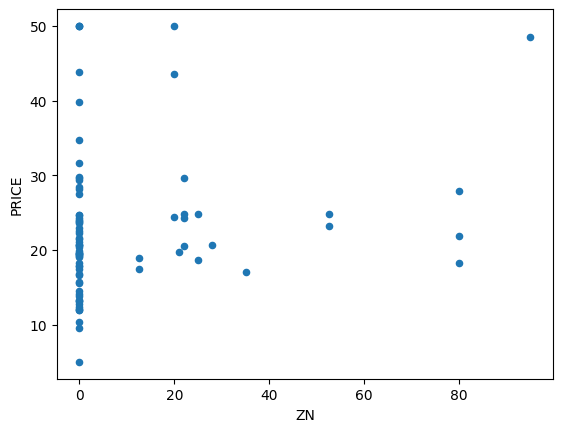

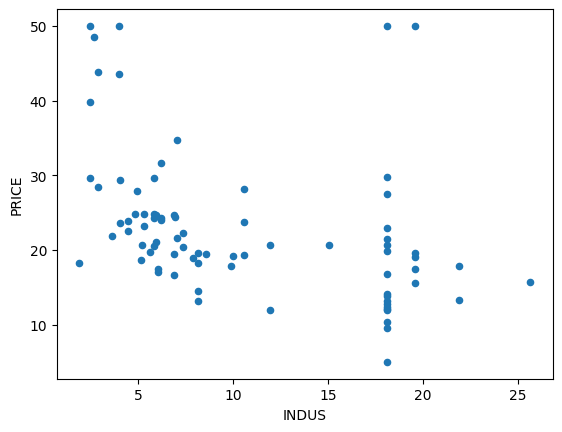

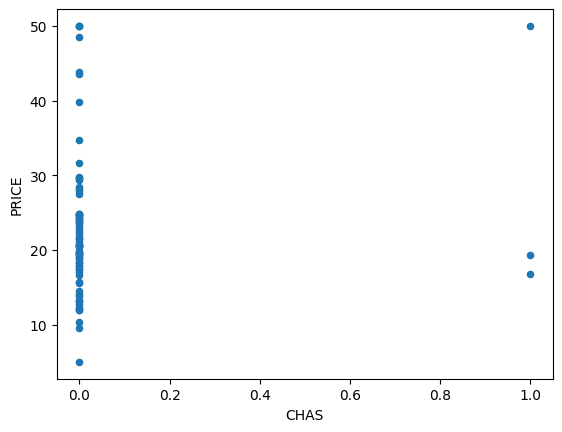

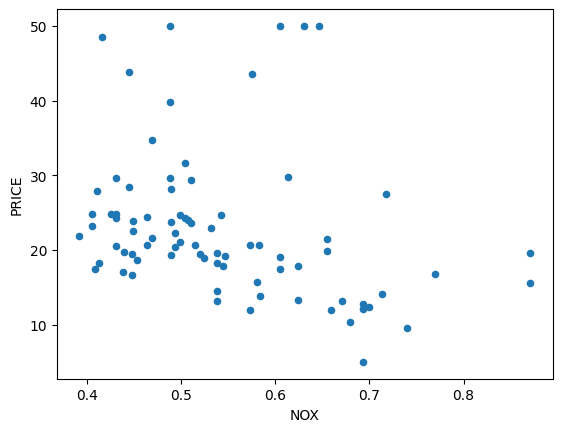

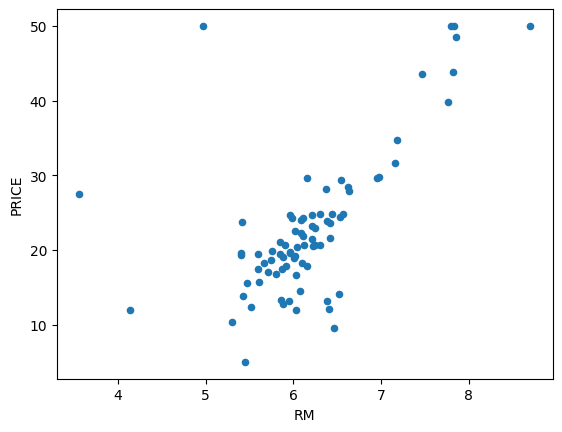

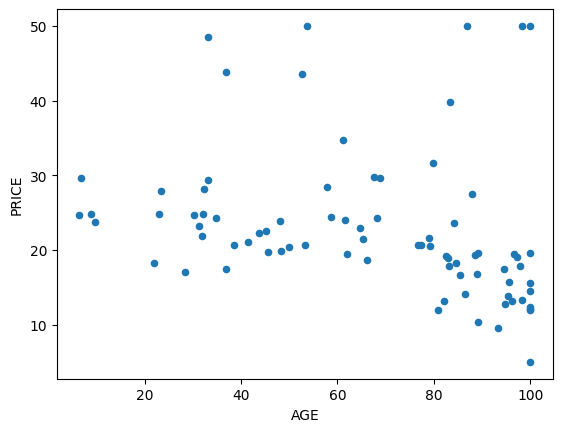

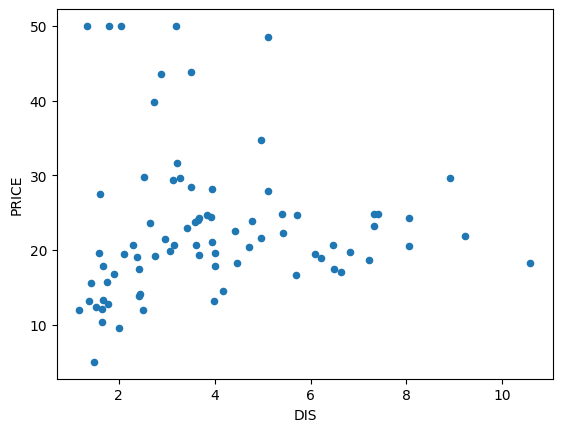

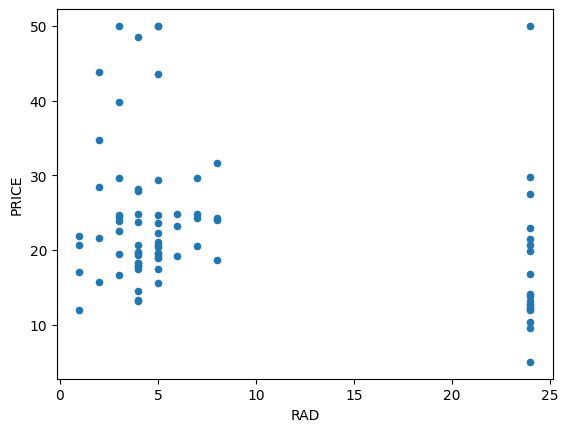

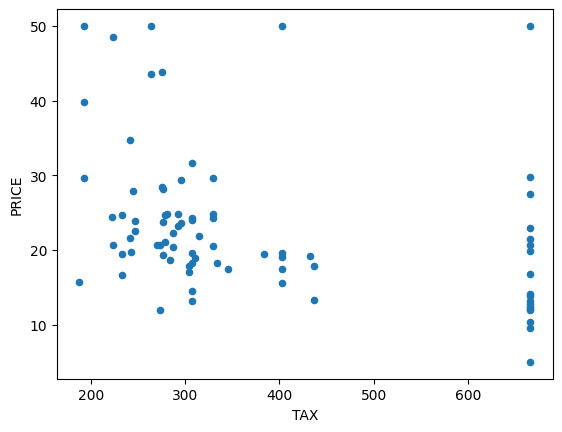

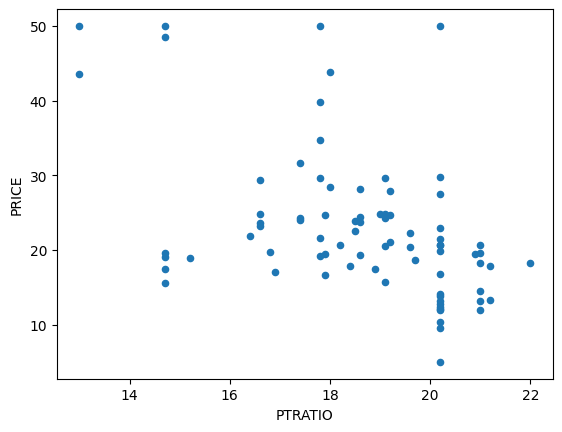

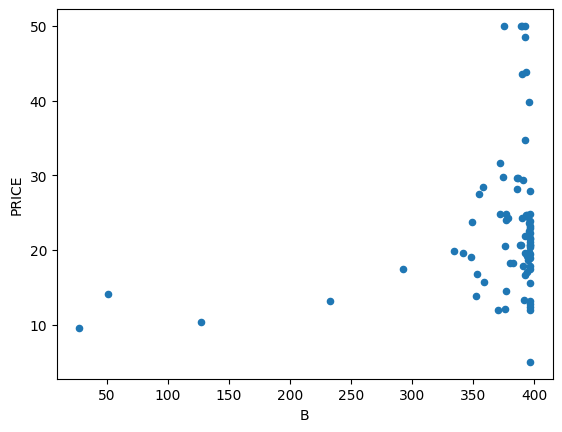

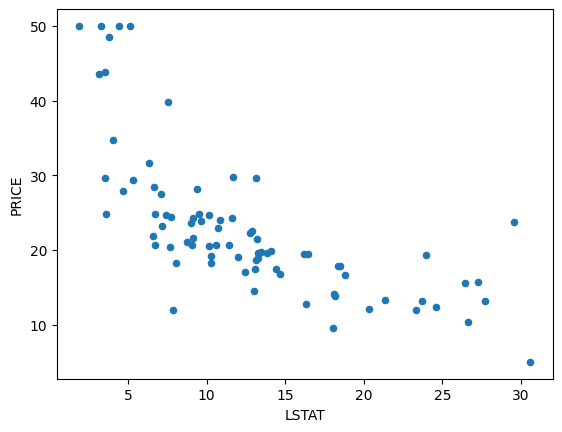

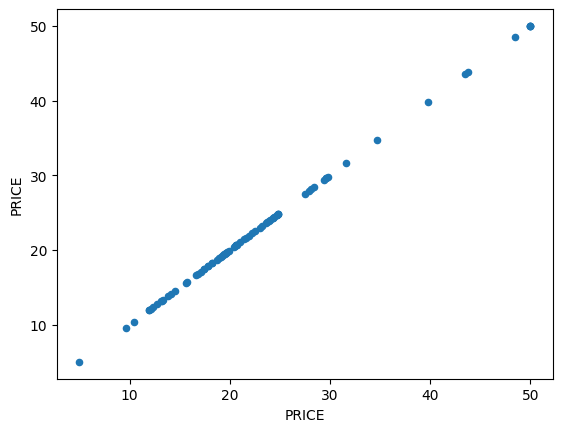

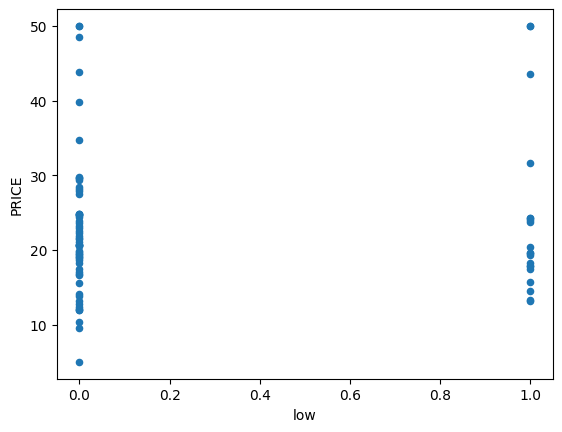

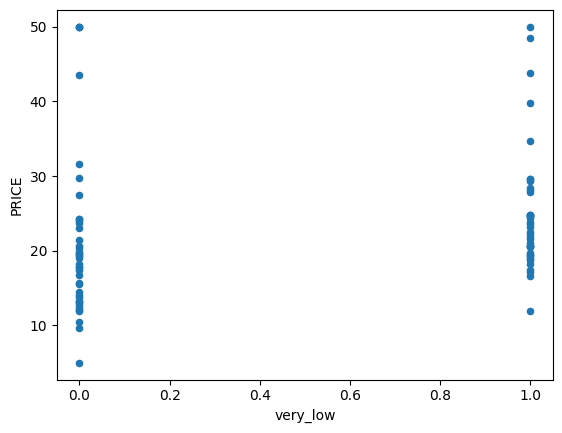

In [63]:
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = 'PRICE')

In [64]:
# 散布図より、INDUS,NOX,RM,PTRATIO,LSTAT列を特徴量とする。

# RM列の外れ値を処理
out_line1 = train_val2[(train_val2['RM'] < 6) & (train_val2['PRICE'] > 40)].index

#PTRATIOの外れ値処理
out_line2 = train_val2[(train_val2['PTRATIO'] > 18)&(train_val2['PRICE'] > 40)].index

print(out_line1,out_line2)

Index([76], dtype='int64') Index([76], dtype='int64')


In [65]:
train_val3 = train_val2.drop([76], axis = 0)

In [66]:
col = ['INDUS','NOX','RM','PTRATIO','LSTAT','PRICE']

train_val4 = train_val3[col]
train_val4.head(3)

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8


In [67]:
train_val4.corr()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.785722,-0.403129,0.249438,0.578406,-0.470889
NOX,0.785722,1.000000,-0.272996,0.077533,0.484295,-0.325289
RM,-0.403129,-0.272996,1.000000,-0.404568,-0.560454,0.753771
PTRATIO,0.249438,0.077533,-0.404568,1.000000,0.326563,-0.542449
LSTAT,0.578406,0.484295,-0.560454,0.326563,1.000000,-0.693490
PRICE,-0.470889,-0.325289,0.753771,-0.542449,-0.693490,1.000000


In [68]:
train_cor = train_val4.corr()['PRICE']
train_cor

INDUS     -0.470889
NOX       -0.325289
RM         0.753771
PTRATIO   -0.542449
LSTAT     -0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

In [69]:
# mapによる絶対値変換
abs_cor = train_cor.map(abs)
# 降順に並び替え
abs_cor.sort_values(ascending = False)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64

In [70]:
# 今回は相関関係が強い上位三列を特徴量とする
col = ['RM','LSTAT','PTRATIO']
x = train_val4[col]
t = train_val4[['PRICE']]

x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [71]:
# 標準化
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

sc_x = sc_model_x.transform(x_train)

In [72]:
# 正解データの標準化
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [73]:
model = LinearRegression()
model.fit(sc_x, sc_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
model.score(x_val, y_val)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-13.0850443750401

In [75]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
model.score(sc_x_val,sc_y_val)

0.7359028880290996

In [76]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [77]:
x = train_val3.loc[:,['RM','LSTAT','PTRATIO']]
t = train_val3[['PRICE']]

s1,s2 = learn(x,t)
print(s1,s2)
x.head(2)

0.7175897572515981 0.7359028880290996


,RM,LSTAT,PTRATIO
43,6.108,9.16,19.1
62,6.957,3.53,19.1


今回の目標は検証データの決定係数が0.87以上、テストデータでの決定係数が0.7以上なのでまだ足りない。

In [78]:
# そこでRM2乗のシリーズを新しい列として追加してみる
x['RM2'] = x['RM'] ** 2
x.head(2)

,RM,LSTAT,PTRATIO,RM2
43,6.108,9.16,19.1,37.307664
62,6.957,3.53,19.1,48.399849


In [79]:
s1,s2 = learn(x,t)
print(s1,s2)

0.8456207631185567 0.8372526287986781


In [80]:
# RM列を2乗した列を追加すると上記の結果のように決定係数の値が大きく上がった。LSTAT列とPTRATIO列でも同様に二乗の列を追加してみる。
x['LSTAT2'] = x['LSTAT'] ** 2
s1,s2 = learn(x,t)
print(s1,s2)
x['PTRATIO2'] = x['PTRATIO'] ** 2
s1,s2 = learn(x,t)
print(s1,s2)

0.8565689444345094 0.8425282632102129
0.864383498898444 0.8678022326740731


In [81]:
# これだけでは足りないのでRM列とLSTAT列の交互作用特徴量を追加してみる。（RMは部屋数、LSTATは低所得者の比率）
x['RM * LSTAT'] = x['RM'] * x['LSTAT']
x.head(2)

,RM,LSTAT,PTRATIO,RM2,LSTAT2,PTRATIO2,RM * LSTAT
43,6.108,9.16,19.1,37.307664,83.9056,364.81,55.94928
62,6.957,3.53,19.1,48.399849,12.4609,364.81,24.55821


In [82]:
s1,s2 = learn(x,t)
print(s1,s2)

0.8668534967796697 0.8739347357775972


これよりチューニングが終了したので、モデルに再学習させる。

In [83]:
# 訓練データと検証データを合わせて再学習させるので、再度標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# 訓練データ＆検証データに行ったのど同様の前処理をテストデータにも行う。
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完
x_test = test2.loc[ :, ['RM','LSTAT', 'PTRATIO'] ]
y_test = test2[['PRICE']]

x_test['RM2'] = x_test['RM'] ** 2
x_test['LSTAT2'] = x_test['LSTAT'] ** 2
x_test['PTRATIO2'] = x_test['PTRATIO'] ** 2

x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']

In [85]:
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

In [86]:
model.score(sc_x_test,sc_y_test)

0.7649249353669054

In [87]:
import pickle
with open('chap08/boston.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('chap08/boston_scx.pkl', 'wb') as f:
    pickle.dump(sc_model_x2, f)
with open('chap08/boston_scy.pkl', 'wb') as f:
    pickle.dump(sc_model_y2, f)